In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
tar = data[['target']]
tar.head()


,target
0,1
1,1
2,1
3,1
4,1


In [3]:
type(data)

pandas.core.frame.DataFrame

In [5]:
x_features = data.iloc[:,1:13]
print(x_features.head())


   sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0    1   3       145   233    1        0      150      0      2.3      0   0   
1    1   2       130   250    0        1      187      0      3.5      0   0   
2    0   1       130   204    0        0      172      0      1.4      2   0   
3    1   1       120   236    0        1      178      0      0.8      2   0   
4    0   0       120   354    0        1      163      1      0.6      2   0   

   thal  
0     1  
1     2  
2     2  
3     2  
4     2  


In [6]:
y_target = tar
y_target.head()

,target
0,1
1,1
2,1
3,1
4,1


In [7]:
print(x_features.shape)
print(y_target.shape)

(303, 12)
(303, 1)


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors = 1)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logreg = LogisticRegression()

In [10]:
logreg.fit(x_features, y_target)


C:\Users\veliv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\veliv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state = 0)

In [12]:
print(x_test.shape)

(61, 12)


In [16]:
logreg.predict(x_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [17]:
print('Accuracy of logistic regression classifier on training data: {:.2f}'.format(logreg.score(x_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on training data: 0.86
Accuracy of logistic regression classifier on test set: 0.84


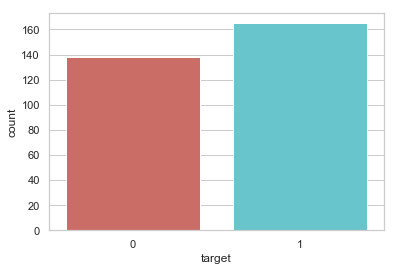

In [45]:
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
data['target'].value_counts()
sns.countplot(x='target',data = data, palette = 'hls')
plt.show()


Text(0,0.5,'heart Disease')

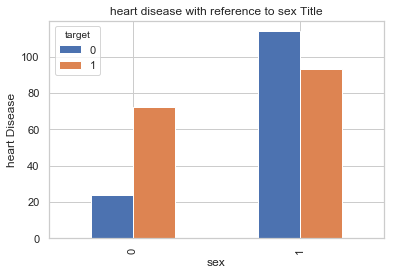

In [40]:
%matplotlib inline
pd.crosstab(data.sex,data.target).plot(kind='bar')
plt.title('heart disease with reference to sex Title')
plt.xlabel('sex')
plt.ylabel('heart Disease')

Text(0,0.5,'heart Disease')

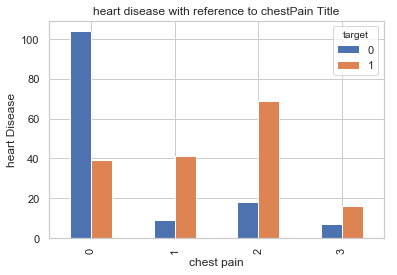

In [44]:
pd.crosstab(data.cp,data.target).plot(kind='bar')
plt.title('heart disease with reference to chestPain Title')
plt.xlabel('chest pain')
plt.ylabel('heart Disease')